In [64]:
# importing libraries 
import pathlib 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import os 
import PIL 
import seaborn as sns 

import Augmentor

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.preprocessing.image import load_img

In [65]:
# defining the path for train and test images 

# Count the number of image in Train and Test directory using the 'glob' to retrieve files / pathnames matching a specified pattern 

data_dir_train = pathlib.Path("/Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))

In [66]:
# Train image count 
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))

print(image_count_train)
print(image_count_test)

2239
118


In [67]:
# Data Visualisation 

# Visualise one instance of all the class present in the dataset 

# image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories 

# label_mode is categorical
# labels are a float32 tensor of shape (batch_size , num_classes) , representing a one-hot encoding of the class index  

image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train , batch_size=32 , image_size = (180 , 180) , label_mode='categorical' , seed=123)

Found 2239 files belonging to 9 classes.


In [68]:
# all the classes of Skin cancer 

class_names = image_dataset.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [69]:
# Dictionary to store the path of image as per the class 
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x : str(data_dir_train)+'/'+c+'/'+x, os.listdir(str(data_dir_train)+'/'+c)))

In [70]:
# display(files_path_dict)
# print(class_names)
# print(files_path_dict['actinic keratosis'][:1])

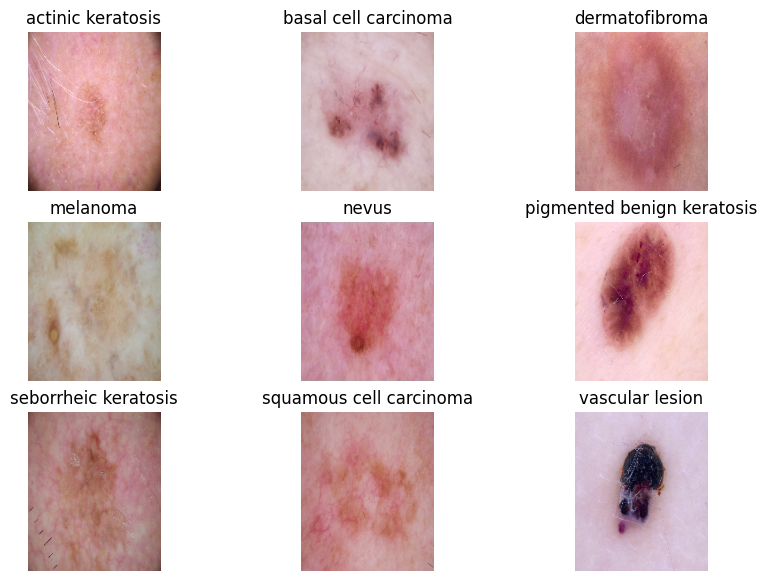

In [71]:
# Visualise image 
plt.figure(figsize=[10,7])
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1] # picking the first picture from a particular class 
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0], target_size=(180, 150)))
    plt.title(c)
    plt.axis("off")

In [72]:
# # Visualise distribution of classes in the training dataset 

# count = []
# tally = 0
# for path in pathlib.Path(data_dir_train).iterdir():
#     # tally+=1
# # print(tally)
#     # print(path)
#     if path.is_dir():
#         # print(path)
#         count.append(len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]))
# sub_

Visualising distribution of classes in the training dataset 

In [73]:
def class_distribution_count(directory):
    count = [] # count number of image in each class
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]))
    # name of the class            
    sub_directory = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

    # return dataframe with image count and class 
    return pd.DataFrame(list(zip(sub_directory, count)), columns=['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,melanoma,438
1,pigmented benign keratosis,462
2,nevus,357
3,basal cell carcinoma,376
4,actinic keratosis,114
5,squamous cell carcinoma,181
6,vascular lesion,139
7,seborrheic keratosis,77
8,dermatofibroma,95


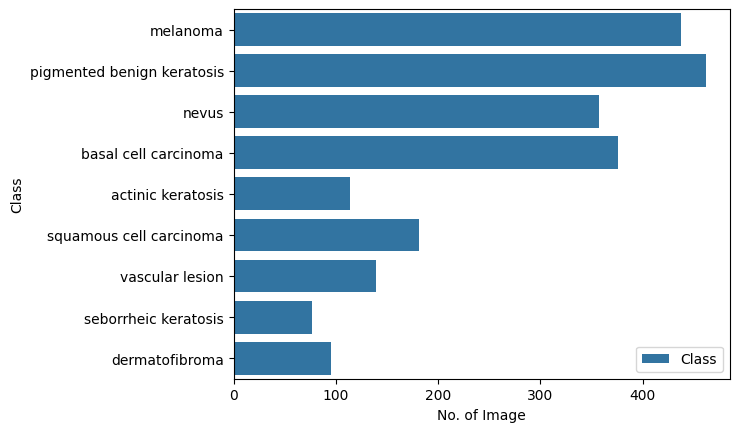

In [74]:
sns.barplot(data=df, y='Class', x='No. of Image', label='Class'); 

There is a class imbalance . To solve this , we will be using a python package 'Augmentor' 

Augmentor is a Python package designed to aid the augmentation and artificial generation of image data for machine learning tasks.

Basically , Augmentor will be used to add more samples across all classes so that none of the classes have less than acceptable samples .

In [75]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [76]:
path_to_training_dataset = '/Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7 , max_left_rotation=10 , max_right_rotation=10)
    # Adding 500 samples per class to make sure that none of the classes are sparse 
    p.sample(500) 

Initialised with 114 image(s) found.
Output directory set to /Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x31ADB9780>: 100%|██████████| 500/500 [00:02<00:00, 202.15 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to /Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x30679C4F0>: 100%|██████████| 500/500 [00:02<00:00, 209.71 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to /Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x302500C70>: 100%|██████████| 500/500 [00:02<00:00, 193.30 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x31ADDC4C0>: 100%|██████████| 500/500 [00:12<00:00, 39.79 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to /Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x31A373D90>: 100%|██████████| 500/500 [00:10<00:00, 47.50 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to /Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3073D9450>: 100%|██████████| 500/500 [00:02<00:00, 190.07 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to /Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x319816A70>: 100%|██████████| 500/500 [00:05<00:00, 89.57 Samples/s]                   


Initialised with 181 image(s) found.
Output directory set to /Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x319D22DD0>: 100%|██████████| 500/500 [00:03<00:00, 162.12 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /Users/ritwik/Desktop/Liverpool John Moores University/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3068833D0>: 100%|██████████| 500/500 [00:02<00:00, 184.56 Samples/s]                  


In [77]:
# Count total number of image generated by Augmentor 

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Model Building 

In [78]:
# train_dataset 

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                               batch_size=32, 
                                                               image_size=(180,180),
                                                               label_mode='categorical', 
                                                               seed=123, 
                                                               subset='training', 
                                                               validation_split=0.2)

# label_mode is categorical , the labels are a float32 tensor of shape(batch_size , 
# num_classes), representing a one-hot encoding of the class index 

# validation dataset 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                             batch_size=32,
                                                             image_size=(180,180), 
                                                             label_mode='categorical',
                                                             seed=123, 
                                                             subset='validation', 
                                                             validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
